<div style="position:relative; height:160px;">
<img src="logoDECATUFS.png" width="500" height="500" style="position:absolute; left:-8px;">
</div>

<div style="text-align:center;font-size:17px; white-space:pre;margin-top:-35px">
        <h3>             Modelos Lineares Generalizados</h3>
        Disciplina ofertada pelo DECAT/UFS
        Código: ESTAT0092
        Nível: Graduação
        Carga horária: 60h
        Período: 2020.2
        Professor responsável e ministrante: Luiz Henrique Dore
        <h3>            Aulas 5 e 6: estimação pelo método da máxima verossimilhança</h3>
</div>

# Exemplo 9

<p style="text-align: justify; font-size:16px">
Considere o conjunto de dados <b>trees.dat</b>, descrito no exemplo 4 da aula 2. O objetivo é ajustar um modelo de regressão gama, com ligação logarítmica, no qual a variável resposta é o volume e as variáveis preditoras são a altura e o diâmetro.
<p>

### 9.1 Leitura e visualização dos dados

In [1]:
dados<-read.table("/Dados/Google_Drive_UFS/Aulas/2020_2/MLG/Dados/trees.dat",header=TRUE)
n<-dim(dados)[1] #Número de observações
p<-dim(dados)[2]+1 #Número de coeficientes (incluindo o intercepto)
head(dados) #Visualizando as primeiras observações

,Diametro,Altura,Volume
,<dbl>,<int>,<dbl>
1,8.3,70,10.3
2,8.6,65,10.3
3,8.8,63,10.2
4,10.5,72,16.4
5,10.7,81,18.8
6,10.8,83,19.7


In [2]:
diam<-dados[,1]
alt<-dados[,2]
vol<-dados[,3]

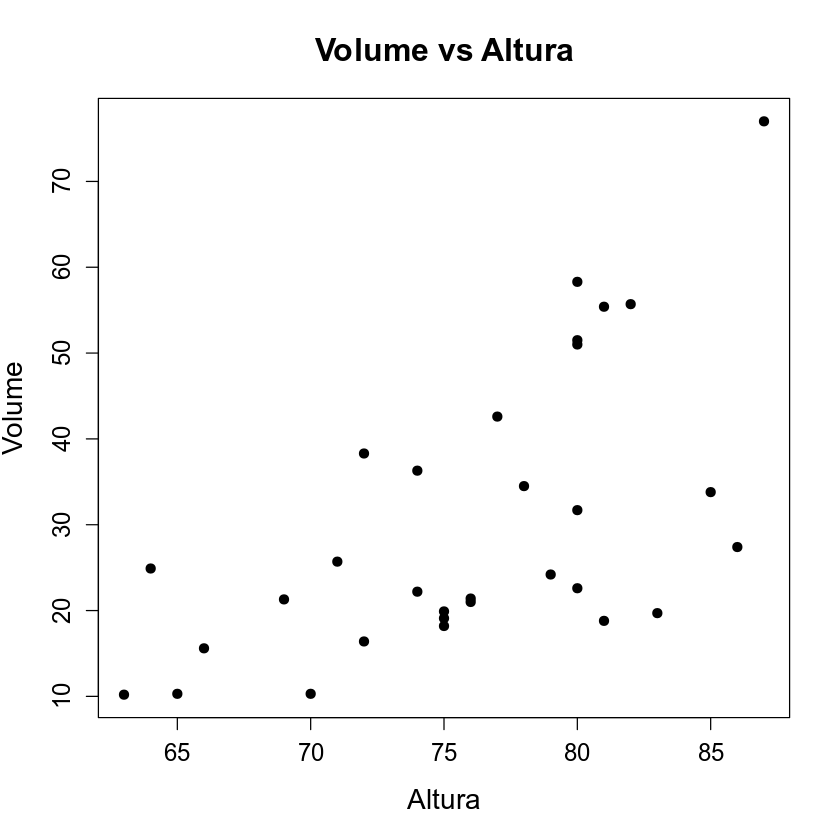

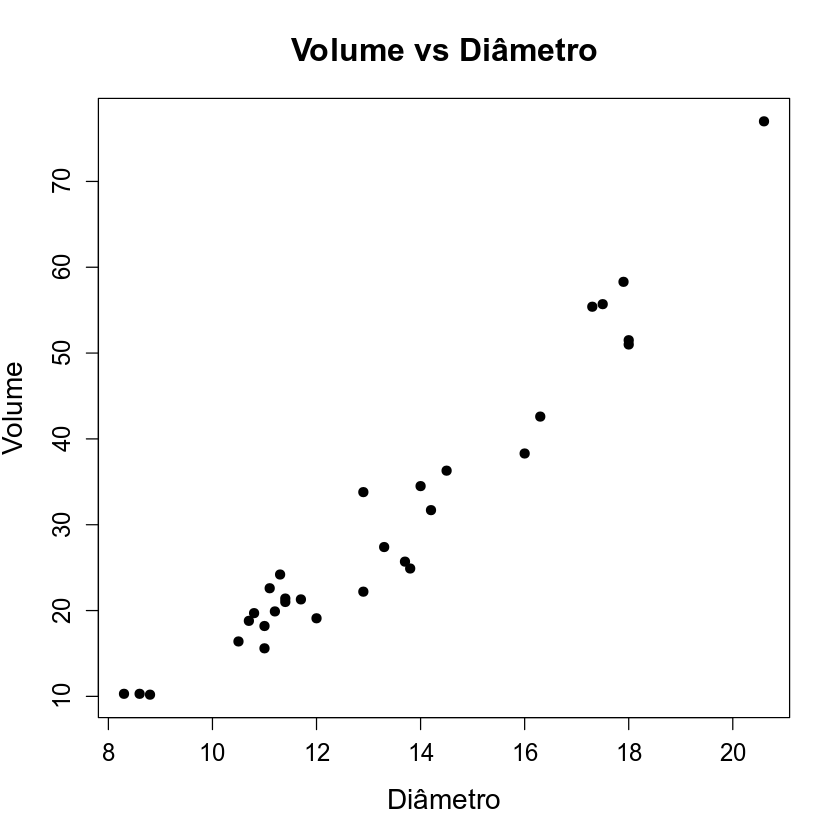

In [3]:
#Volume vs Altura
plot(alt,vol,pch=20,cex=1.5,xlab="Altura",ylab="Volume",cex.lab=1.4,cex.main=1.6,main="Volume vs Altura",cex.axis=1.2)

#Volume vs Diâmetro
plot(diam,vol,pch=20,cex=1.5,xlab="Diâmetro",ylab="Volume",cex.lab=1.4,cex.main=1.6,main="Volume vs Diâmetro",cex.axis=1.2)

### 9.2 Formulação do modelo

<p style="text-align: justify; font-size:15px">
    <ol style="font-size:16px">
        <li>$Volume\sim Gama(a,b)$;</li>
        <li>$\eta=\beta_0+\beta_1\cdot Altura+\beta_2\cdot Diâmetro$;</li>
        <li>$\ln\left(\mu\right)=\eta$.</li>
    </ol>
</p>

### 9.3 Estimação do vetor de coeficientes de regressão $\boldsymbol{\beta}$ utilizando o algoritmo escore de Fisher

<p style="text-align: justify; font-size:16px">Gerando o vetor dos valores observados da resposta e a matriz design.</p>

In [4]:
y<-as.numeric(dados[,3])
X<-as.matrix(dados[,-3])
X<-cbind(1,X)
head(X)

,Diametro,Altura
1,8.3,70
1,8.6,65
1,8.8,63
1,10.5,72
1,10.7,81
1,10.8,83


<p style="text-align: justify; font-size:16px">Calculando a estimativa de máxima verossimilhança de $\boldsymbol{\beta}$ suando o algoritmo escore de Fisher.</p>

<p style="text-align: justify; font-size:16px">No caso da distribuição Gama, $\boldsymbol{V}=\hbox{diag}\{\mu_1^2,\cdots,\mu_n^2\}$. Como a ligação é a logarítmica, então $\mu_i=e^{\eta_i}$ e $\boldsymbol{W}=\hbox{diag}\{1,\cdots,1\}$. Para cada $i\in\{1,\cdots,n\}$, a estimativa inicial de $\mu_i$ é o i-ésimo valor observado da resposta. Isto é, $\mu^{(0)}=(y_1,\cdots,y_n)^T=\boldsymbol{y}$.</p>

In [5]:
mu0<-y #Estimativa inicial para mu (vetor de médias).
eta0<-log(mu0) #Cálculo do valor inicial do vetor eta (vetor de preditores lineares)
V0<-diag(mu0^2) #Cálculo do valor inicial da matriz diagonal V (matriz das funções de variância)
W0<-diag(1,n) #Cálculo do valor inicial da matriz diagonal W (matriz de pesos)
V0Inv<-diag(1/(mu0^2)) #Valor inicial da inversa de V
W0Inv<-diag(1,n) #Valor inicial da inversa de W
z0<-eta0+((W0Inv^(1/2))%*%(V0Inv^(1/2)))%*%(y-mu0) #Cálculo do valor inicial de z
beta0<-as.numeric(solve(t(X)%*%W0%*%X)%*%(t(X)%*%W0%*%z0)) #Cálculo do valor inicial de beta

#Bloco de iteração
iterMax<-100 #Número máximo de iterações
iter<-0
conv<-FALSE
while(1){
    iter<-iter+1
    eta0<-as.numeric(X%*%beta0)  #Atualização do valor do preditor linear
    mu0<-exp(eta0) #Atualização do valor de mu
    V0<-diag(mu0^2) #Atualização do valor da matriz diagonal V (matriz das funções de variância)
    W0<-diag(1,n) #Atualização do valor da matriz diagonal W (matriz das funções de pesos)
    V0Inv<-diag(1/(mu0^2)) #Inversa da matriz diagonal V atualizada
    W0Inv<-diag(1,n) #Inversa da matriz diagonal W atualizada
    z0<-eta0+((W0Inv^(1/2))%*%(V0Inv^(1/2)))%*%(y-mu0) #Atualização do valor de z
    beta1<-as.numeric(solve(t(X)%*%W0%*%X)%*%(t(X)%*%W0%*%z0)) #Atualização de beta (vetor de coeficientes de regressão)
    #Critério de convergência: diferença máxima entre os compenentes de beta(m+1) e beta(m) menor do que 10e-5
    if(all(abs(beta0-beta1)<1e-5)){
        conv<-TRUE
        break
    }
    beta0<-beta1
    if(iter==iterMax){
        break
    }
}

if(conv){
    print(paste("O algoritmo escore de Fisher convergiu em",iter,"passos."))
    beta<-beta1 #Estimativa de máxima verossimilhança de beta
    names(beta)<-colnames(X)
    names(beta)[1]<-"Intercepto"
    eta<-X%*%beta #Estimativa de máxima verossimilhança de eta
    mu<-exp(eta) #Estimativa de máxima verossimilhança de mu
}
if(!conv){
    print(paste("O algoritmo escore de Fisher não convergiu em",iter,"passos."))
}

[1] "O algoritmo escore de Fisher convergiu em 4 passos."


<p style="text-align: justify;font-size: 16px">Visualizando as estimativas dos coeficientes de regressão.</p>

In [6]:
print(beta)

Intercepto   Diametro     Altura 
0.09230311 0.14528124 0.01657789 


<p style="text-align: justify; font-size:16px">Calculando a estimativa de máxima verossimilhança de $\boldsymbol{\phi}$ suando o algoritmo escore de Fisher.</p>

In [7]:
phiPearson<-sum((y-mu)^2/(mu^2))/(n-p)
phi0<-phiPearson
Uphi0<-phi0^(-2)*sum((y-mu)/mu+log(mu/y))-n*phi0^(-2)*(log(phi0^(-1))-digamma(phi0^(-1))) #Valor inicial de Uphi 
Kphi0<-n*phi0^(-4)*(trigamma(phi0^(-1))-phi0) #Valor inicial de Kphiphi

#Bloco de iteração
iterMax<-100 #Número máximo de iterações
iter<-0
conv<-FALSE
while(1){
    iter<-iter+1
    phi1<-phi0+Uphi0/Kphi0 #Atualização do valor de phi
    #Critério de convergência: diferença máxima entre phi(m) e phi(m-1) menor do que 10e-5
    if(all(abs(phi0-phi1)<1e-5)){
        conv<-TRUE
        break
    }
    phi0<-phi1
    Uphi0<-phi0^(-2)*sum((y-mu)/mu+log(mu/y))-n*phi0^(-2)*(log(phi0^(-1))-digamma(phi0^(-1))) #Valor inicial de Uphi
    Kphi0<-n*phi0^(-4)*(trigamma(phi0^(-1))-phi0) #Valor inicial de Kphiphi
    if(iter==iterMax){
        break
    }
}

if(conv){
    print(paste("O algoritmo escore de Fisher convergiu em",iter,"passos."))
    phi<-phi1 #Estimativa de máxima verossimilhança de phi
    names(phi)<-"Dispersão"
}
if(!conv){
    print(paste("O algoritmo escore de Fisher não convergiu em",iter,"passos."))
}

[1] "O algoritmo escore de Fisher convergiu em 2 passos."


<p style="text-align: justify;font-size: 16px">Visualizando as estimativas dos coeficientes de regressão e do parâmetro de dispersão.</p>

In [8]:
print(phi)

  Dispersão 
0.008455011 


<p style="text-align: justify;font-size: 16px">Visualizando as estimativas dos coeficientes de regressão e do parâmetro de dispersão.</p>

In [9]:
print(c(beta,phi))

 Intercepto    Diametro      Altura   Dispersão 
0.092303109 0.145281238 0.016577895 0.008455011 


### 9.4 Estimação dos parâmetros pelo método escore de Fisher usando as funções ``glm`` e ``gamma.shape``.

<p style="text-align: justify;font-size: 16px">Carregando os pacotes necessários.</p>

In [10]:
library(MASS) #Contém a função gamma.shape

<p style="text-align: justify;font-size: 16px">A função <font face="'Courier New'">glm</font> realiza o ajuste de
    um MLG. Os coeficientes de regressão são estimados pelo método da máxima verossimilhança, com o algoritmo 
    escore de Fisher. O estimador do parâmetro de dispersão depende do modelo. Os argumentos mais básicos são</p>
    <ol style="text-align: justify; font-size:16px">
        <li><font face="'Courier New'">formula</font>: especificação do preditor linear;</li>
        <li><font face="'Courier New'">family</font>: especificação da distribuição de probabilidade da resposta e da função de ligação.</li>
    </ol>
<p style="text-align: justify;font-size: 16px"> Para mais informações sobre a função <font face="'Courier 
    New'">glm</font> e seus argumentos, acesse a ajuda da função executando o comando <font face="'Courier New'">?glm</font>. Para informações sobre as distribuições de probabilidade e as funções de ligação disponíveis, 
    execute o comando <font face="'Courier New'">?family</font>.
</p>

In [11]:
aj<-glm(formula=Volume~Diametro+Altura,family=Gamma(link="log"),data=dados)
beta<-aj$coefficients

<p style="text-align: justify;font-size: 16px">A função <font face="'Courier New'">gamma.shape</font> recebe o objeto retornado pela função <font face="'Courier New'">glm</font> e retorna a estimativa de máxima verossimilhança de $\alpha=\frac{1}{\phi}$, calculado utilizando o método escore de Fisher.</p>

In [12]:
ajPhi<-gamma.shape(aj)
alpha<-ajPhi$alpha
phi<-1/alpha
names(phi)<-"Dispersão"

<p style="text-align: justify;font-size: 16px">Visualizando as estimativas dos coeficientes de regressão e do parâmetro de dispersão.</p>

In [13]:
print(c(beta,phi))

(Intercept)    Diametro      Altura   Dispersão 
0.092304581 0.145281192 0.016577883 0.008455011 


<p style="text-align: justify;font-size: 16px">Visualizando as respostas médias e os respectivos valores ajustados.</p>

In [14]:
muAj<-predict(aj,type="response") #Respostas médias ajustadas
head(cbind(vol,muAj))

,vol,muAj
1,10.3,11.68832
2,10.3,11.23782
3,10.2,11.19185
4,16.4,16.63260
5,18.8,19.87816
6,19.7,20.84900


<p style="text-align: justify;font-size: 16px">Visualizando a curva ajustada.</p>

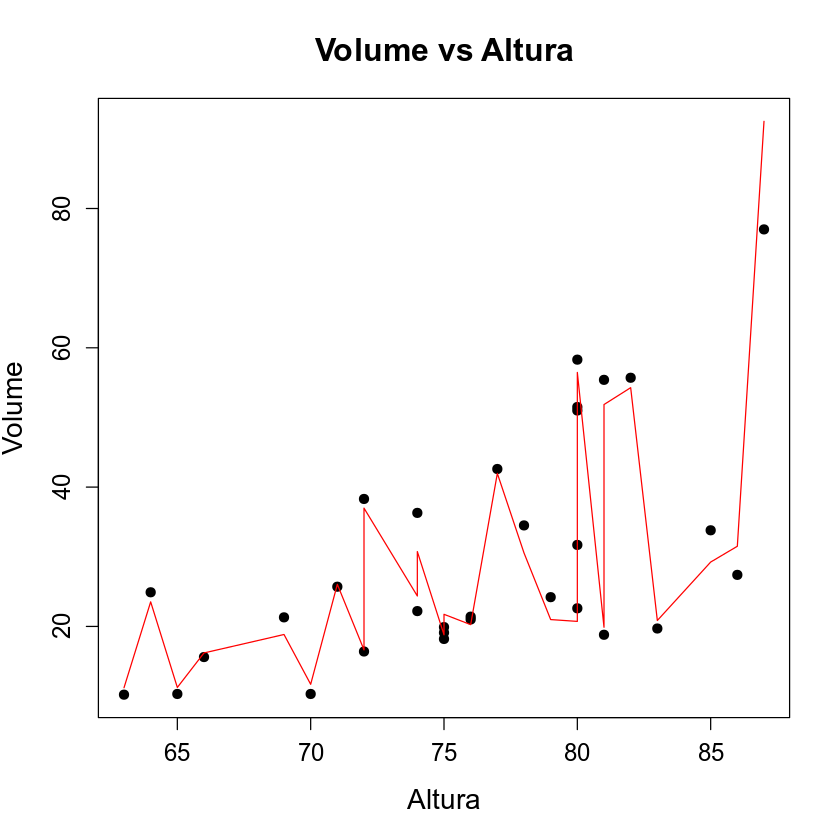

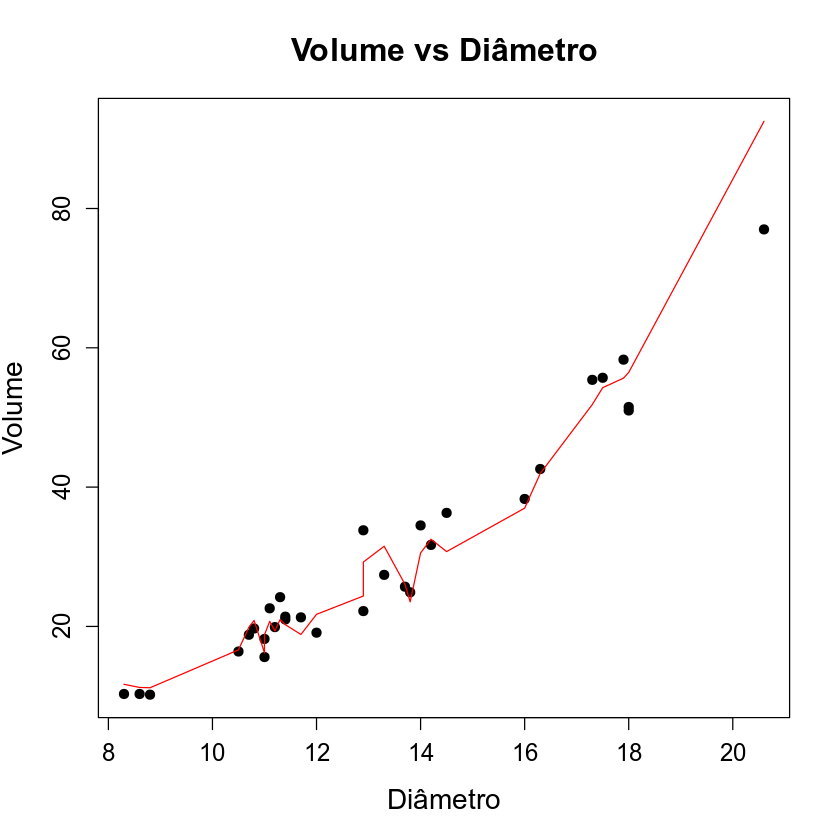

In [15]:
yLim<-c(min(c(vol,muAj)),max(c(vol,muAj)))

#Volume vs Altura
I<-order(alt)
plot(alt,vol,pch=20,cex=1.5,xlab="Altura",ylab="Volume",ylim=yLim,cex.lab=1.4,cex.main=1.6,main="Volume vs Altura",cex.axis=1.2)
points(alt[I],muAj[I],type="l",col="red")

#Volume vs Diâmetro
I<-order(diam)
plot(diam,vol,pch=20,cex=1.5,xlab="Diâmetro",ylab="Volume",ylim=yLim,cex.lab=1.4,cex.main=1.6,main="Volume vs Diâmetro",cex.axis=1.2)
points(diam[I],muAj[I],type="l",col="red")

### 9.5 Interpretação do modelo

<p style="text-align: justify;font-size: 16px">Visualizando as estimativas dos coeficientes de regressão e do parâmetro de dispersão.</p>

In [16]:
aux<-summary(aj)
beta<-aj$coefficients
phi<-aux$dispersion
names(phi)<-"Dispersão"
print(c(beta,phi))

(Intercept)    Diametro      Altura   Dispersão 
0.092304581 0.145281192 0.016577883 0.009410213 


<p style="text-align: justify;font-size: 16px">Equação de regressão ajustada.</p>

<p style="text-align: justify;font-size: 20px">$\hat\mu=e^{0,0923+0,1453\cdot Diâmetro+0,0166\cdot Altura}=e^{0,0923}\cdot e^{0,1453\cdot Diâmetro}\cdot e^{0,0166\cdot Altura}$.</p>

<p style="text-align: justify;font-size: 16px">Calculando a exponencial dos coeficientes de regressão.</p>

In [17]:
print(exp(beta))

(Intercept)    Diametro      Altura 
   1.096699    1.156365    1.016716 


<p style="text-align: justify; font-size:16px">Interpretando os coeficientes de regressão. </p>
    <ol style="text-align: justify; font-size:16px">
        <li>Como $\beta_1$ e $\beta_2$ são positivos, quanto maior altura e/ou o diâmetro, maior o volume médio da
            árvore.</li>
        <li>Estima-se que, quando a árvore cresce uma unidade, seu volume fica, em média, cerca de 1,0167 vezes 
            maior. Isto é, ele aumenta, em média, cerca de 1,67%.</li>
        <li>Estima-se que, quando o diâmetro da árvore cresce uma unidade, o seu volume fica, em média, cerca de 
            1,1564 vezes maior. isto é, ele aumenta, em média, cerca de 15,64%.</li>
    </ol>